# WNS Analytics Hackathon - Model

In [8]:
import os
os.chdir('E:/Anupam/HomeDocs/DataScience/Hackathon/WNS_Analytics')
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score

In [10]:
# Read the dataset
train_dataset = pd.read_csv ('Dataset/train_EDA.csv')
test_dataset = pd.read_csv ('Dataset/test_EDA.csv')
train_dataset.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,total_training_score,...,education_Below Secondary,education_Master's & above,education_Not Known,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,age_bin_31-40,age_bin_41-50,age_bin_51-60,age_bin_nan
0,65438,1,35,5.0,8,1,0,49,0,49,...,0,1,0,0,0,1,1,0,0,0
1,65141,1,30,5.0,4,0,0,60,0,60,...,0,0,0,1,0,0,0,0,0,0
2,7513,1,34,3.0,7,0,0,50,0,50,...,0,0,0,1,0,1,1,0,0,0
3,2542,2,39,1.0,10,0,0,50,0,100,...,0,0,0,1,0,0,1,0,0,0
4,48945,1,45,3.0,2,0,0,73,0,73,...,0,0,0,1,0,0,0,1,0,0


In [11]:
train_dataset.info()
train_dataset[train_dataset.columns[train_dataset.isnull().any()]].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 68 columns):
employee_id                            54808 non-null int64
no_of_trainings                        54808 non-null int64
age                                    54808 non-null int64
previous_year_rating                   54808 non-null float64
length_of_service                      54808 non-null int64
KPIs_met >80%                          54808 non-null int64
awards_won?                            54808 non-null int64
avg_training_score                     54808 non-null int64
is_promoted                            54808 non-null int64
total_training_score                   54808 non-null int64
no_of_trainings_per_year_of_service    54808 non-null float64
Age_at_joining                         54808 non-null int64
department_average                     54808 non-null float64
region_average                         54808 non-null float64
education_average                      5480

Series([], dtype: float64)

### Normalization the data using MinMax Scaler

In [12]:
from sklearn.preprocessing import MinMaxScaler

train_dataset_MinMax = train_dataset.drop(['employee_id','is_promoted'], axis=1)
#display(train_dataset_MinMax.head(10))

#Normalize the datasets with MinMaxScaler
min_max = MinMaxScaler()
# Scaling down both train and test data set
train_dataset_normalized = min_max.fit_transform(train_dataset_MinMax[train_dataset_MinMax.columns])

# Normalize the test dataset also
test_dataset_MinMax = test_dataset.drop(['employee_id'], axis=1)
test_dataset_normalized = min_max.fit_transform(test_dataset_MinMax[test_dataset_MinMax.columns])

train_dataset_normalized

array([[0.   , 0.375, 1.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.25 , 1.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.35 , 0.5  , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.175, 1.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.225, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.175, 0.   , ..., 0.   , 0.   , 0.   ]])

In [13]:
temp = round(pd.DataFrame(min_max.inverse_transform(train_dataset_normalized)), 0)
temp.columns = train_dataset_MinMax.columns
temp.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,total_training_score,no_of_trainings_per_year_of_service,Age_at_joining,...,education_Below Secondary,education_Master's & above,education_Not Known,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,age_bin_31-40,age_bin_41-50,age_bin_51-60,age_bin_nan
0,1.0,35.0,5.0,7.0,1.0,0.0,49.0,48.0,0.0,28.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,30.0,5.0,4.0,0.0,0.0,60.0,58.0,0.0,27.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,34.0,3.0,6.0,0.0,0.0,50.0,49.0,0.0,28.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,2.0,39.0,1.0,9.0,0.0,0.0,50.0,95.0,0.0,30.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,45.0,3.0,2.0,0.0,0.0,73.0,70.0,0.0,43.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


### Split the dataset into train and validate

In [14]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_dataset_normalized, train_dataset.is_promoted, test_size=0.33, \
                                                    random_state=3)

### Compare the accuracy of the algorithms

In [15]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import naive_bayes
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [16]:

MLA = [
    #GLM
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(probability=True),
    KNeighborsClassifier(),
    naive_bayes.BernoulliNB(),
    XGBClassifier(),
    LGBMClassifier(),
    CatBoostClassifier()
    ]

In [18]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    predicted = alg.fit(train_dataset_normalized, train_dataset.is_promoted).predict(X_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'Algorithm Name'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'Precission'] = metrics.precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Recall'] = metrics.recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = metrics.auc(fpr, tpr)

    row_index+=1
    
MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

0:	learn: 0.6054350	total: 251ms	remaining: 4m 10s
1:	learn: 0.5418174	total: 398ms	remaining: 3m 18s
2:	learn: 0.4994247	total: 485ms	remaining: 2m 41s
3:	learn: 0.4533498	total: 631ms	remaining: 2m 37s
4:	learn: 0.4240568	total: 744ms	remaining: 2m 28s
5:	learn: 0.3953979	total: 828ms	remaining: 2m 17s
6:	learn: 0.3733122	total: 925ms	remaining: 2m 11s
7:	learn: 0.3521336	total: 1s	remaining: 2m 4s
8:	learn: 0.3350594	total: 1.09s	remaining: 1m 59s
9:	learn: 0.3212123	total: 1.17s	remaining: 1m 55s
10:	learn: 0.3076658	total: 1.25s	remaining: 1m 52s
11:	learn: 0.2961984	total: 1.32s	remaining: 1m 48s
12:	learn: 0.2823962	total: 1.4s	remaining: 1m 46s
13:	learn: 0.2738054	total: 1.47s	remaining: 1m 43s
14:	learn: 0.2661589	total: 1.54s	remaining: 1m 41s
15:	learn: 0.2538809	total: 1.61s	remaining: 1m 39s
16:	learn: 0.2438863	total: 1.69s	remaining: 1m 37s
17:	learn: 0.2389698	total: 1.75s	remaining: 1m 35s
18:	learn: 0.2336983	total: 1.83s	remaining: 1m 34s
19:	learn: 0.2297357	total:

163:	learn: 0.1606646	total: 9.25s	remaining: 47.1s
164:	learn: 0.1604818	total: 9.29s	remaining: 47s
165:	learn: 0.1604291	total: 9.34s	remaining: 46.9s
166:	learn: 0.1603552	total: 9.39s	remaining: 46.9s
167:	learn: 0.1602565	total: 9.44s	remaining: 46.7s
168:	learn: 0.1601966	total: 9.48s	remaining: 46.6s
169:	learn: 0.1601000	total: 9.52s	remaining: 46.5s
170:	learn: 0.1599392	total: 9.56s	remaining: 46.4s
171:	learn: 0.1598672	total: 9.61s	remaining: 46.3s
172:	learn: 0.1597664	total: 9.65s	remaining: 46.1s
173:	learn: 0.1597151	total: 9.7s	remaining: 46s
174:	learn: 0.1596294	total: 9.73s	remaining: 45.9s
175:	learn: 0.1595909	total: 9.78s	remaining: 45.8s
176:	learn: 0.1595613	total: 9.82s	remaining: 45.7s
177:	learn: 0.1594616	total: 9.86s	remaining: 45.5s
178:	learn: 0.1594255	total: 9.91s	remaining: 45.4s
179:	learn: 0.1593680	total: 9.95s	remaining: 45.3s
180:	learn: 0.1593245	total: 9.99s	remaining: 45.2s
181:	learn: 0.1592872	total: 10s	remaining: 45.1s
182:	learn: 0.15925

325:	learn: 0.1518932	total: 15.8s	remaining: 32.8s
326:	learn: 0.1518568	total: 15.9s	remaining: 32.7s
327:	learn: 0.1518350	total: 15.9s	remaining: 32.6s
328:	learn: 0.1518043	total: 16s	remaining: 32.5s
329:	learn: 0.1517865	total: 16s	remaining: 32.5s
330:	learn: 0.1517393	total: 16s	remaining: 32.4s
331:	learn: 0.1517083	total: 16.1s	remaining: 32.3s
332:	learn: 0.1516876	total: 16.1s	remaining: 32.2s
333:	learn: 0.1516499	total: 16.1s	remaining: 32.2s
334:	learn: 0.1515921	total: 16.2s	remaining: 32.1s
335:	learn: 0.1515536	total: 16.2s	remaining: 32s
336:	learn: 0.1515133	total: 16.3s	remaining: 32s
337:	learn: 0.1514912	total: 16.3s	remaining: 31.9s
338:	learn: 0.1514643	total: 16.3s	remaining: 31.8s
339:	learn: 0.1514092	total: 16.4s	remaining: 31.8s
340:	learn: 0.1513793	total: 16.4s	remaining: 31.7s
341:	learn: 0.1513127	total: 16.4s	remaining: 31.6s
342:	learn: 0.1512789	total: 16.5s	remaining: 31.6s
343:	learn: 0.1512363	total: 16.5s	remaining: 31.5s
344:	learn: 0.1512041	

490:	learn: 0.1465773	total: 21.1s	remaining: 21.8s
491:	learn: 0.1465497	total: 21.1s	remaining: 21.8s
492:	learn: 0.1465193	total: 21.1s	remaining: 21.7s
493:	learn: 0.1464927	total: 21.2s	remaining: 21.7s
494:	learn: 0.1464724	total: 21.2s	remaining: 21.6s
495:	learn: 0.1464117	total: 21.2s	remaining: 21.6s
496:	learn: 0.1463821	total: 21.2s	remaining: 21.5s
497:	learn: 0.1463582	total: 21.3s	remaining: 21.4s
498:	learn: 0.1463236	total: 21.3s	remaining: 21.4s
499:	learn: 0.1463037	total: 21.3s	remaining: 21.3s
500:	learn: 0.1462835	total: 21.4s	remaining: 21.3s
501:	learn: 0.1462429	total: 21.4s	remaining: 21.2s
502:	learn: 0.1462225	total: 21.4s	remaining: 21.2s
503:	learn: 0.1461941	total: 21.4s	remaining: 21.1s
504:	learn: 0.1461760	total: 21.5s	remaining: 21s
505:	learn: 0.1461516	total: 21.5s	remaining: 21s
506:	learn: 0.1461169	total: 21.5s	remaining: 20.9s
507:	learn: 0.1460940	total: 21.6s	remaining: 20.9s
508:	learn: 0.1460640	total: 21.6s	remaining: 20.8s
509:	learn: 0.14

654:	learn: 0.1421885	total: 25.8s	remaining: 13.6s
655:	learn: 0.1421418	total: 25.9s	remaining: 13.6s
656:	learn: 0.1421217	total: 25.9s	remaining: 13.5s
657:	learn: 0.1420861	total: 25.9s	remaining: 13.5s
658:	learn: 0.1420684	total: 26s	remaining: 13.4s
659:	learn: 0.1420397	total: 26s	remaining: 13.4s
660:	learn: 0.1420123	total: 26s	remaining: 13.3s
661:	learn: 0.1419878	total: 26s	remaining: 13.3s
662:	learn: 0.1419638	total: 26.1s	remaining: 13.3s
663:	learn: 0.1419432	total: 26.1s	remaining: 13.2s
664:	learn: 0.1419275	total: 26.1s	remaining: 13.2s
665:	learn: 0.1418970	total: 26.2s	remaining: 13.1s
666:	learn: 0.1418713	total: 26.2s	remaining: 13.1s
667:	learn: 0.1418515	total: 26.2s	remaining: 13s
668:	learn: 0.1418375	total: 26.2s	remaining: 13s
669:	learn: 0.1418094	total: 26.3s	remaining: 12.9s
670:	learn: 0.1417800	total: 26.3s	remaining: 12.9s
671:	learn: 0.1417671	total: 26.3s	remaining: 12.8s
672:	learn: 0.1417441	total: 26.4s	remaining: 12.8s
673:	learn: 0.1417248	to

816:	learn: 0.1382438	total: 30.6s	remaining: 6.85s
817:	learn: 0.1382146	total: 30.6s	remaining: 6.81s
818:	learn: 0.1381937	total: 30.6s	remaining: 6.77s
819:	learn: 0.1381659	total: 30.7s	remaining: 6.73s
820:	learn: 0.1381399	total: 30.7s	remaining: 6.69s
821:	learn: 0.1381121	total: 30.7s	remaining: 6.65s
822:	learn: 0.1381077	total: 30.7s	remaining: 6.61s
823:	learn: 0.1380779	total: 30.8s	remaining: 6.57s
824:	learn: 0.1380598	total: 30.8s	remaining: 6.53s
825:	learn: 0.1380355	total: 30.8s	remaining: 6.49s
826:	learn: 0.1380206	total: 30.9s	remaining: 6.46s
827:	learn: 0.1380065	total: 30.9s	remaining: 6.42s
828:	learn: 0.1379709	total: 30.9s	remaining: 6.38s
829:	learn: 0.1379472	total: 30.9s	remaining: 6.34s
830:	learn: 0.1379023	total: 31s	remaining: 6.3s
831:	learn: 0.1378817	total: 31s	remaining: 6.26s
832:	learn: 0.1378566	total: 31s	remaining: 6.22s
833:	learn: 0.1378261	total: 31.1s	remaining: 6.18s
834:	learn: 0.1377863	total: 31.1s	remaining: 6.14s
835:	learn: 0.13776

978:	learn: 0.1345565	total: 35.3s	remaining: 757ms
979:	learn: 0.1345384	total: 35.3s	remaining: 721ms
980:	learn: 0.1345093	total: 35.4s	remaining: 685ms
981:	learn: 0.1344928	total: 35.4s	remaining: 648ms
982:	learn: 0.1344766	total: 35.4s	remaining: 612ms
983:	learn: 0.1344538	total: 35.4s	remaining: 576ms
984:	learn: 0.1344286	total: 35.5s	remaining: 540ms
985:	learn: 0.1344079	total: 35.5s	remaining: 504ms
986:	learn: 0.1343966	total: 35.5s	remaining: 468ms
987:	learn: 0.1343855	total: 35.5s	remaining: 432ms
988:	learn: 0.1343501	total: 35.6s	remaining: 396ms
989:	learn: 0.1343357	total: 35.6s	remaining: 360ms
990:	learn: 0.1342995	total: 35.6s	remaining: 324ms
991:	learn: 0.1342717	total: 35.7s	remaining: 288ms
992:	learn: 0.1342663	total: 35.7s	remaining: 252ms
993:	learn: 0.1342180	total: 35.7s	remaining: 216ms
994:	learn: 0.1341927	total: 35.8s	remaining: 180ms
995:	learn: 0.1341739	total: 35.8s	remaining: 144ms
996:	learn: 0.1341621	total: 35.8s	remaining: 108ms
997:	learn: 

,Algorithm Name,Train Accuracy,Test Accuracy,Precission,Recall,AUC
1,DecisionTreeClassifier,0.9999,0.9996,1.000000,0.995404,0.997702
7,CatBoostClassifier,0.9472,0.9474,0.976628,0.384110,0.691633
6,LGBMClassifier,0.9449,0.9445,0.962633,0.355220,0.676976
5,XGBClassifier,0.9390,0.9389,0.970721,0.282994,0.641105
0,LogisticRegression,0.9317,0.9311,0.818391,0.233749,0.614490
3,KNeighborsClassifier,0.9247,0.9238,0.721713,0.154957,0.574732
2,SVC,0.9227,0.9229,1.000000,0.084045,0.542022
4,BernoulliNB,0.9129,0.9141,0.425743,0.056467,0.524732


#### Inference
1. XG Boost, Logistic Regression and KNN appears to be best performing algorithms
2. We shall now do model development with these three algorithm

### Lets reduce dimentionality

In [11]:
# Import the packages
from sklearn.cross_validation import cross_val_score
from sklearn.decomposition import PCA

In [141]:
#Initialize the features
predictors = X = train_dataset_normalized
label = y = train_dataset.is_promoted


In [142]:
#Build the PCA model
pca = PCA(n_components = len(train_dataset.columns) - 2)
pca.fit_transform(predictors)
variance_ratio = pca.explained_variance_ratio_
display(variance_ratio)
display(pca.explained_variance_)

array([  1.271e-01,   8.538e-02,   7.965e-02,   7.248e-02,   6.716e-02,
         6.430e-02,   5.295e-02,   4.946e-02,   3.641e-02,   3.218e-02,
         2.438e-02,   2.400e-02,   2.157e-02,   1.985e-02,   1.704e-02,
         1.449e-02,   1.363e-02,   1.333e-02,   1.322e-02,   1.185e-02,
         1.074e-02,   9.868e-03,   9.046e-03,   8.732e-03,   7.956e-03,
         7.120e-03,   7.030e-03,   6.270e-03,   6.154e-03,   6.086e-03,
         5.933e-03,   4.861e-03,   4.751e-03,   4.492e-03,   4.289e-03,
         4.221e-03,   4.131e-03,   3.962e-03,   3.890e-03,   3.828e-03,
         3.636e-03,   3.516e-03,   3.379e-03,   3.272e-03,   3.215e-03,
         2.767e-03,   2.516e-03,   2.260e-03,   2.173e-03,   2.070e-03,
         1.795e-03,   1.552e-03,   1.364e-03,   8.247e-04,   8.164e-04,
         5.319e-04,   2.334e-04,   1.665e-04,   1.162e-04,   2.284e-05,
         4.145e-31,   2.506e-32,   4.698e-33,   4.531e-33,   3.825e-33,
         3.670e-34])

array([  4.626e-01,   3.109e-01,   2.900e-01,   2.639e-01,   2.445e-01,
         2.341e-01,   1.928e-01,   1.801e-01,   1.326e-01,   1.172e-01,
         8.876e-02,   8.736e-02,   7.854e-02,   7.225e-02,   6.205e-02,
         5.276e-02,   4.963e-02,   4.855e-02,   4.812e-02,   4.313e-02,
         3.908e-02,   3.592e-02,   3.293e-02,   3.179e-02,   2.897e-02,
         2.592e-02,   2.560e-02,   2.283e-02,   2.241e-02,   2.216e-02,
         2.160e-02,   1.770e-02,   1.730e-02,   1.635e-02,   1.562e-02,
         1.537e-02,   1.504e-02,   1.442e-02,   1.416e-02,   1.394e-02,
         1.324e-02,   1.280e-02,   1.230e-02,   1.191e-02,   1.171e-02,
         1.008e-02,   9.159e-03,   8.229e-03,   7.910e-03,   7.536e-03,
         6.535e-03,   5.649e-03,   4.967e-03,   3.002e-03,   2.972e-03,
         1.936e-03,   8.496e-04,   6.064e-04,   4.231e-04,   8.316e-05,
         1.509e-30,   9.124e-32,   1.710e-32,   1.650e-32,   1.392e-32,
         1.336e-33])

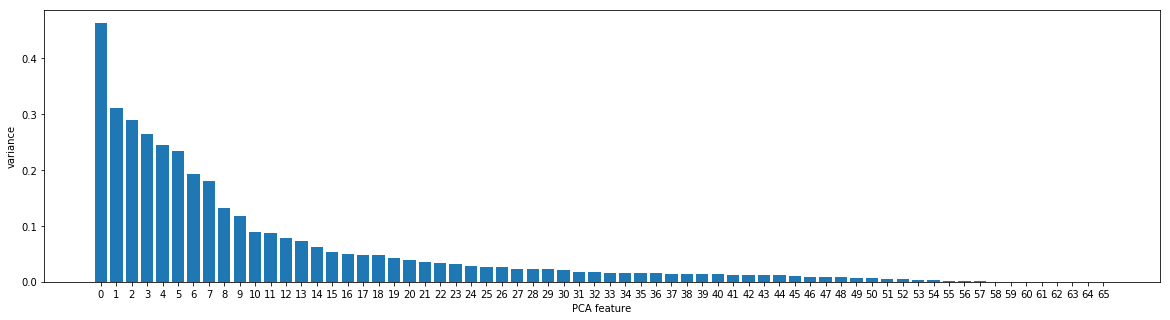

In [143]:
#Plot the Scree Plot
plt.figure(figsize=[20,5])
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

array([  12.71,   21.25,   29.21,   36.46,   43.18,   49.61,   54.91,
         59.86,   63.5 ,   66.72,   69.16,   71.56,   73.72,   75.7 ,
         77.4 ,   78.85,   80.21,   81.54,   82.86,   84.04,   85.11,
         86.1 ,   87.  ,   87.87,   88.67,   89.38,   90.08,   90.71,
         91.33,   91.94,   92.53,   93.02,   93.5 ,   93.95,   94.38,
         94.8 ,   95.21,   95.61,   96.  ,   96.38,   96.74,   97.09,
         97.43,   97.76,   98.08,   98.36,   98.61,   98.84,   99.06,
         99.27,   99.45,   99.61,   99.75,   99.83,   99.91,   99.96,
         99.98,  100.  ,  100.01,  100.01,  100.01,  100.01,  100.01,
        100.01,  100.01,  100.01])

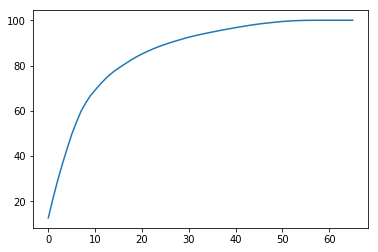

In [144]:
#Plot the cumulating sum of variance ratio
variance_ratio_cum_sum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4) * 100)
display(variance_ratio_cum_sum)
plt.plot(variance_ratio_cum_sum)

In [145]:
#Now build the model with chosen number of Principal Components
pca = PCA(n_components = 60)
train_pca = pca.fit_transform(predictors)  # This train_pca should be used in any model in place of X_train
test_pca = pca.fit_transform(test_dataset_normalized) # This test_pca should be used in any model in place of X_test
print(train_pca)

[[  6.959e-01  -2.286e-02   1.141e+00 ...,  -1.650e-03  -5.896e-03
   -4.501e-03]
 [ -2.397e-01  -1.646e-01  -6.595e-01 ...,  -2.137e-04  -3.006e-04
    2.234e-04]
 [ -8.024e-01   1.666e-01   8.084e-01 ...,  -3.747e-03  -4.976e-03
   -4.811e-03]
 ..., 
 [ -2.424e-01  -3.372e-01  -7.712e-01 ...,   3.963e-02   1.892e-01
    7.570e-03]
 [ -9.897e-01   9.588e-01   1.392e-01 ...,  -5.974e-03   3.858e-04
   -5.538e-03]
 [ -5.627e-01   3.240e-01  -2.857e-01 ...,   7.184e-05   3.725e-04
   -2.169e-03]]


In [146]:
variance_ratio_cum_sum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4) * 100)
display(variance_ratio_cum_sum)

array([  8.96,  17.05,  23.91,  30.6 ,  36.8 ,  42.57,  47.98,  53.06,
        57.61,  61.14,  64.14,  66.47,  68.55,  70.57,  72.47,  74.3 ,
        75.91,  77.27,  78.6 ,  79.89,  81.13,  82.25,  83.34,  84.39,
        85.33,  86.22,  87.07,  87.85,  88.53,  89.2 ,  89.82,  90.43,
        90.99,  91.54,  92.08,  92.57,  93.05,  93.52,  93.96,  94.4 ,
        94.81,  95.21,  95.6 ,  95.99,  96.37,  96.73,  97.08,  97.41,
        97.72,  98.03,  98.3 ,  98.56,  98.81,  99.03,  99.24,  99.42,
        99.59,  99.74,  99.82,  99.88])

### Lets do Feature Selection

In [149]:
# Feature Extraction with Recursive feature elimination (RFE)
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

feature_importance = train_dataset.drop(['employee_id','is_promoted'], axis=1).values
y = train_dataset.is_promoted
# feature extraction
model = XGBClassifier()
rfe = RFE(model, 20)
feature_importance = rfe.fit(feature_importance, y)
print("Num Features: %d" , feature_importance.n_features_)
print("Selected Features: %s", feature_importance.support_)
print("Feature Ranking: %s", feature_importance.ranking_)

Num Features: %d 20
Selected Features: %s [False  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True False  True  True  True  True False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False]
Feature Ranking: %s [ 6  1  1  1  1  1  1  1  1  1  1  1  1 32  1  1  1 20  1  1  1  1 25 27 29
 33 35 37 39 41 43 45 47  4  8  9  2 10 11 12  3 22 23  1 31 38 36 34 30 28
 26 24 21 13 14 15 16 17 18 19  7  5 40 42 44 46]


In [165]:
display(X)
i = 0
cols = []
for e in rfe.support_:
    if e == True:
        cols.append(X[i])
    i = i+1
#display(cols)
#train_dataset_normalized = cols
#train_dataset_normalized

array([[ 0.   ,  0.375,  1.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.25 ,  1.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.35 ,  0.5  , ...,  0.   ,  0.   ,  0.   ],
       ..., 
       [ 0.   ,  0.175,  1.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.225,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.175,  0.   , ...,  0.   ,  0.   ,  0.   ]])

### Split the dataset into train and validate

We shall not be using PCA components in model evaluation as the accuracy of the model is extremely critical and thus do not want to compromise on accuracy. 

In [12]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_dataset_normalized, train_dataset.is_promoted, test_size=0.33, random_state=3)

### Build the Logistic Regression Model

In [56]:
#Import libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [66]:
test_dataset.shape

(23490, 55)

In [58]:
#Build the logistic regression model with 1 variable
log_reggression = LogisticRegression(C=1e42)
log_reggression.fit(X_train, y_train)
#print(logreg.coef_)
#print(logreg.intercept_)
y_pred = log_reggression.predict_proba(X_test)
y_pred

array([[0.97273432, 0.02726568],
       [0.97196488, 0.02803512],
       [0.97669488, 0.02330512],
       ...,
       [0.97367564, 0.02632436],
       [0.90842695, 0.09157305],
       [0.62549084, 0.37450916]])

In [59]:
#now applying our learnt model on test and also on train and test data
y_log_pred_train = log_reggression.predict(X_train)
y_log_pred_test = log_reggression.predict(X_test)
y_log_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
#comparing the metrics of predicted lebel and real label of test data
metrics.accuracy_score(y_train, y_log_pred_train)

0.93232755099262

In [61]:
#comparing the metrics of predicted lebel and real label of test data
metrics.accuracy_score(y_test, y_log_pred_test)


0.9318847791231271

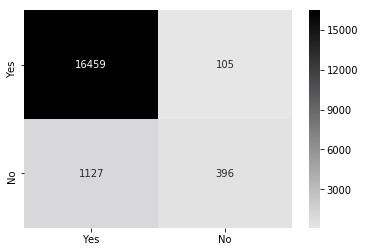

In [62]:
#creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(y_test, y_log_pred_test)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap, xticklabels = ['Yes','No'], yticklabels = ['Yes','No'], annot=True,  fmt="d")

In [68]:
predicted_test_dataset = log_reggression.predict(test_dataset_normalized)
predicted_test_dataset

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [69]:
test_dataset['is_promoted'] = predicted_test_dataset
test_dataset.sample(5)

,employee_id,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,total_training_score,...,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,is_promoted
8279,36730,2,1,27,4.0,1,1,0,85,85,...,0,0,0,0,0,0,0,0,1,0
17930,13631,2,1,26,1.0,3,0,0,47,47,...,1,0,0,0,0,0,1,0,1,0
9876,56248,3,2,31,1.0,6,1,0,55,110,...,0,0,0,0,0,0,1,0,1,0
22005,57718,3,1,40,4.0,5,0,0,50,50,...,0,0,0,1,0,0,0,0,0,0
13287,15121,2,1,27,3.0,1,0,0,80,80,...,0,0,0,0,0,0,1,0,0,0


In [70]:
# Output the Dataframe into a CSV file
test_dataset[['employee_id', 'is_promoted']].to_csv('Submission_Anupam_LR.csv',  index = False)
test_dataset.drop('is_promoted', axis = 1, inplace = True)

### Build the KNN Model

In [71]:
# Import libraries for Random Forest
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import math

In [72]:
y = y.values
# Get all the values from the dataset for the selected column
features = X.values

In [73]:
my_tree_one = tree.DecisionTreeClassifier(criterion="entropy", max_depth=14 , min_samples_split = 5)
my_tree_one = my_tree_one.fit(X_train, y_train)

In [74]:
#The feature_importances_ attribute make it simple to interpret the significance of the predictors you include
print(my_tree_one.score(X_train, y_train))
print(my_tree_one.score(X_test, y_test))

0.9471419623648594
0.9376900536296787


In [75]:
list(zip(feature_cols, my_tree_one.feature_importances_))

[('education', 0.0068757726369761815),
 ('no_of_trainings', 0.0012657890428266348),
 ('age', 0.030802727399590234),
 ('previous_year_rating', 0.07908149722084074),
 ('length_of_service', 0.011652874209605753),
 ('KPIs_met >80%', 0.1572714941593253),
 ('awards_won?', 0.04118116390977143),
 ('avg_training_score', 0.3161310998230134),
 ('total_training_score', 0.025200327605446535),
 ('no_of_trainings_per_year_of_service', 0.008843784232588508),
 ('department_Finance', 0.019133151201278325),
 ('department_HR', 0.017765767379651458),
 ('department_Legal', 0.0035231604201298415),
 ('department_Operations', 0.05366621939878532),
 ('department_Procurement', 0.043721265430308125),
 ('department_R&D', 0.0014485398283978436),
 ('department_Sales & Marketing', 0.12001961996633947),
 ('department_Technology', 0.014337432343334965),
 ('region_region_10', 0.0002976242858299214),
 ('region_region_11', 0.001316632052445039),
 ('region_region_12', 0.000460584656529598),
 ('region_region_13', 0.0),
 ('r

In [76]:
pred = my_tree_one.predict(X_test)

In [77]:
#Print Confusion matrix 
df_confusion = metrics.confusion_matrix(y_test, pred)
df_confusion

array([[16457,   107],
       [ 1020,   503]], dtype=int64)

Text(0.5,0,'False Positive Rate')

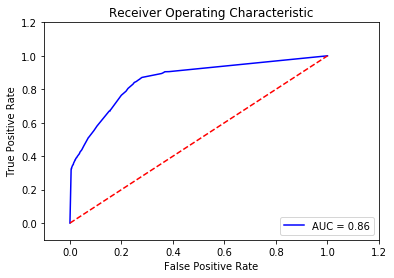

In [78]:
# ROC curve on Predicted probabilities
pred_proba = my_tree_one.predict_proba(X_test)
# Calculate False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = metrics.roc_curve(y_test, pred_proba[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [81]:
# Building and fitting my_forest
forest = RandomForestClassifier(max_depth = 14, min_samples_split=10, n_estimators = 100, random_state = 3)

In [82]:
my_forest = forest.fit(X_train, y_train)

In [83]:
# Print the score of the fitted random forest
print(my_forest.score(X_train, y_train))

0.9365213365649083


In [84]:
y_predict =  my_forest.predict(X_test)
print(my_forest.score(X_test, y_test))
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_predict))
print('RMSE:' , rmse)

0.9329905456958036
RMSE: 0.2588618440485125


In [85]:
print(my_forest.feature_importances_)
list(zip(feature_cols, my_forest.feature_importances_))

[9.08602015e-03 2.13563591e-02 3.40158990e-02 6.53096811e-02
 2.66954596e-02 1.13404229e-01 8.11585861e-02 3.28153533e-01
 1.00298596e-01 3.07012157e-02 6.49514034e-03 5.29008850e-03
 2.32692037e-03 2.41409504e-02 9.55141353e-03 3.53071334e-03
 4.96202088e-02 8.60395933e-03 9.37590274e-04 1.46449953e-03
 1.01324209e-03 1.95847501e-03 1.51014947e-03 2.59026447e-03
 1.83785355e-03 2.72793714e-03 0.00000000e+00 1.34380601e-03
 3.57316001e-03 1.25279197e-03 1.11180069e-03 5.13150560e-03
 2.80769259e-03 1.11361757e-03 2.49243720e-03 2.38845086e-03
 1.96639860e-03 2.81268371e-03 2.56779054e-03 1.50832302e-03
 1.84048978e-03 2.16627808e-03 1.22522782e-03 3.93490659e-04
 2.46766027e-04 4.78144143e-03 9.38640225e-04 7.82820691e-04
 4.84034206e-03 1.28882567e-03 6.29850698e-04 7.32867530e-03
 3.60631115e-03 6.08139642e-03]


[('education', 0.00908602014797605),
 ('no_of_trainings', 0.02135635907353374),
 ('age', 0.03401589898388222),
 ('previous_year_rating', 0.06530968108032682),
 ('length_of_service', 0.026695459638366777),
 ('KPIs_met >80%', 0.113404229441831),
 ('awards_won?', 0.08115858613204359),
 ('avg_training_score', 0.32815353347107773),
 ('total_training_score', 0.10029859576356566),
 ('no_of_trainings_per_year_of_service', 0.030701215689097495),
 ('department_Finance', 0.0064951403431927025),
 ('department_HR', 0.005290088495036272),
 ('department_Legal', 0.002326920374646948),
 ('department_Operations', 0.024140950396647078),
 ('department_Procurement', 0.009551413527516749),
 ('department_R&D', 0.003530713342876095),
 ('department_Sales & Marketing', 0.04962020884873266),
 ('department_Technology', 0.00860395932734553),
 ('region_region_10', 0.0009375902741225368),
 ('region_region_11', 0.0014644995310981238),
 ('region_region_12', 0.0010132420875346346),
 ('region_region_13', 0.0019584750087

In [86]:
#Print Confusion matrix 
df_confusion = metrics.confusion_matrix(y_test, y_predict)
df_confusion

array([[16550,    14],
       [ 1198,   325]], dtype=int64)

In [87]:
pred_test = my_forest.predict(test_dataset.drop('employee_id', axis = 1))

In [88]:
test_dataset['is_promoted'] = pred_test

In [89]:
# Output the Dataframe into a CSV file
test_dataset[['employee_id', 'is_promoted']].to_csv('Submission_Anupam_RF.csv',  index = False)
test_dataset.drop('is_promoted', axis = 1, inplace = True)

### Build the XG Boost Model

In [13]:
from xgboost import XGBClassifier
from sklearn.grid_search import GridSearchCV

C:\Users\Anupam\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [14]:
cv_params = {'max_depth': [3,5,7,10], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 

In [15]:
optimized_GBM

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7, 10], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [16]:
xg_model =  optimized_GBM.fit(X_train, y_train)

In [17]:
optimized_GBM.grid_scores_

[mean: 0.94159, std: 0.00139, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.94123, std: 0.00121, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.94107, std: 0.00124, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.93712, std: 0.00120, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.93758, std: 0.00096, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.93777, std: 0.00142, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.93309, std: 0.00255, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.93298, std: 0.00173, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.93385, std: 0.00222, params: {'max_depth': 7, 'min_child_weight': 5},
 mean: 0.93146, std: 0.00194, params: {'max_depth': 10, 'min_child_weight': 1},
 mean: 0.93015, std: 0.00119, params: {'max_depth': 10, 'min_child_weight': 3},
 mean: 0.93099, std: 0.00149, params: {'max_depth': 10, 'min_child_weight': 5}]

In [18]:
import xgboost
xgdmat = xgboost.DMatrix(X_train, y_train) # Create our DMatrix to make XGBoost more efficient

In [19]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 
# Grid Search CV optimized settings

cv_xgb = xgboost.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5, metrics = ['auc'], \
                          early_stopping_rounds = 100)

In [20]:
cv_xgb.tail(5)

,test-auc-mean,test-auc-std,train-auc-mean,train-auc-std
299,0.909751,0.004328,0.933800,0.000634
300,0.909774,0.004321,0.933845,0.000653
301,0.909791,0.004373,0.933887,0.000638
302,0.909834,0.004384,0.933928,0.000651
303,0.909874,0.004394,0.933998,0.000681


In [21]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 

final_gb = xgboost.train(our_params, xgdmat, num_boost_round = 493)

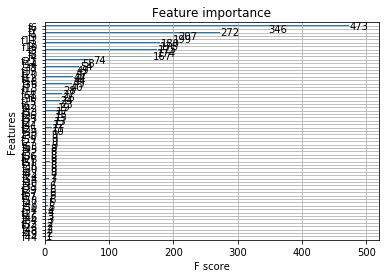

In [22]:
xgboost.plot_importance(final_gb)

In [23]:
testdmat = xgboost.DMatrix(X_test)

In [24]:
from sklearn.metrics import accuracy_score
y_pred = final_gb.predict(testdmat)
y_pred

array([ 0.03318269,  0.00323998,  0.00309335, ...,  0.01132951,
        0.00600135,  0.32168368], dtype=float32)

In [25]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
y_pred

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [26]:
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)

(0.94172610161994807, 0.058273898380051925)

In [27]:
# Now make the prediction on final test dataset
testdmat_final = xgboost.DMatrix(test_dataset_normalized)

In [28]:
y_pred_final = final_gb.predict(testdmat_final)
y_pred_final

array([  6.42527342e-01,   4.25321632e-04,   7.46085716e-05, ...,
         2.08055397e-04,   2.28591681e-01,   2.23119885e-01], dtype=float32)

In [29]:
y_pred_final[y_pred_final > 0.5] = 1
y_pred_final[y_pred_final <= 0.5] = 0
y_pred_final

array([ 1.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [30]:
test_dataset['is_promoted'] = y_pred_final

In [31]:
# Output the Dataframe into a CSV file
test_dataset[['employee_id', 'is_promoted']].to_csv('Submission_Anupam_XGB.csv',  index = False)
test_dataset.drop('is_promoted', axis = 1, inplace = True)